In [1]:
import numpy as np
import pandas as pd
import scanpy.api as sc
import matplotlib.pyplot as plt

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=100, color_map='viridis')# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.figdir = './figures/endo/'
adata = sc.read("C:/Users/seowjjw/Dropbox/Liver_Paper/Github/data/HCCmyewoF.h5ad")

import scvelo as scv
import loompy
import scanpy as sc
scv.logging.print_version()

C:\ProgramData\Anaconda3\lib\site-packages\anndata\base.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


scanpy==1.4 anndata==0.6.19 numpy==1.17.4 scipy==1.1.0 pandas==1.1.2 scikit-learn==0.21.3 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 
Running scvelo 0.1.24 (python 3.7.1) on 2020-09-17 16:58.


In [2]:
adata

AnnData object with n_obs × n_vars = 6898 × 2384 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'patient_id', 'patientno', 'patient_tumorsection', 'ViralvsNonViral', 'PNC', 'PIC', 'NormalvsTumor', 'median genes exp', 'dpt_pseudotime', 'DC1', 'DC2', 'pDC'
    var: 'gene_ids', 'n_cells'
    uns: 'NormalvsTumor_colors', 'ViralvsNonViral_colors', 'diffmap_evals', 'draw_graph', 'iroot', 'louvain', 'louvain_colors', 'louvain_sizes', 'neighbors', 'paga', 'patientno_colors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_draw_graph_fr', 'X_diffmap'
    varm: 'PCs'

saving figure to file ./figures/endo/umap_louvain.png


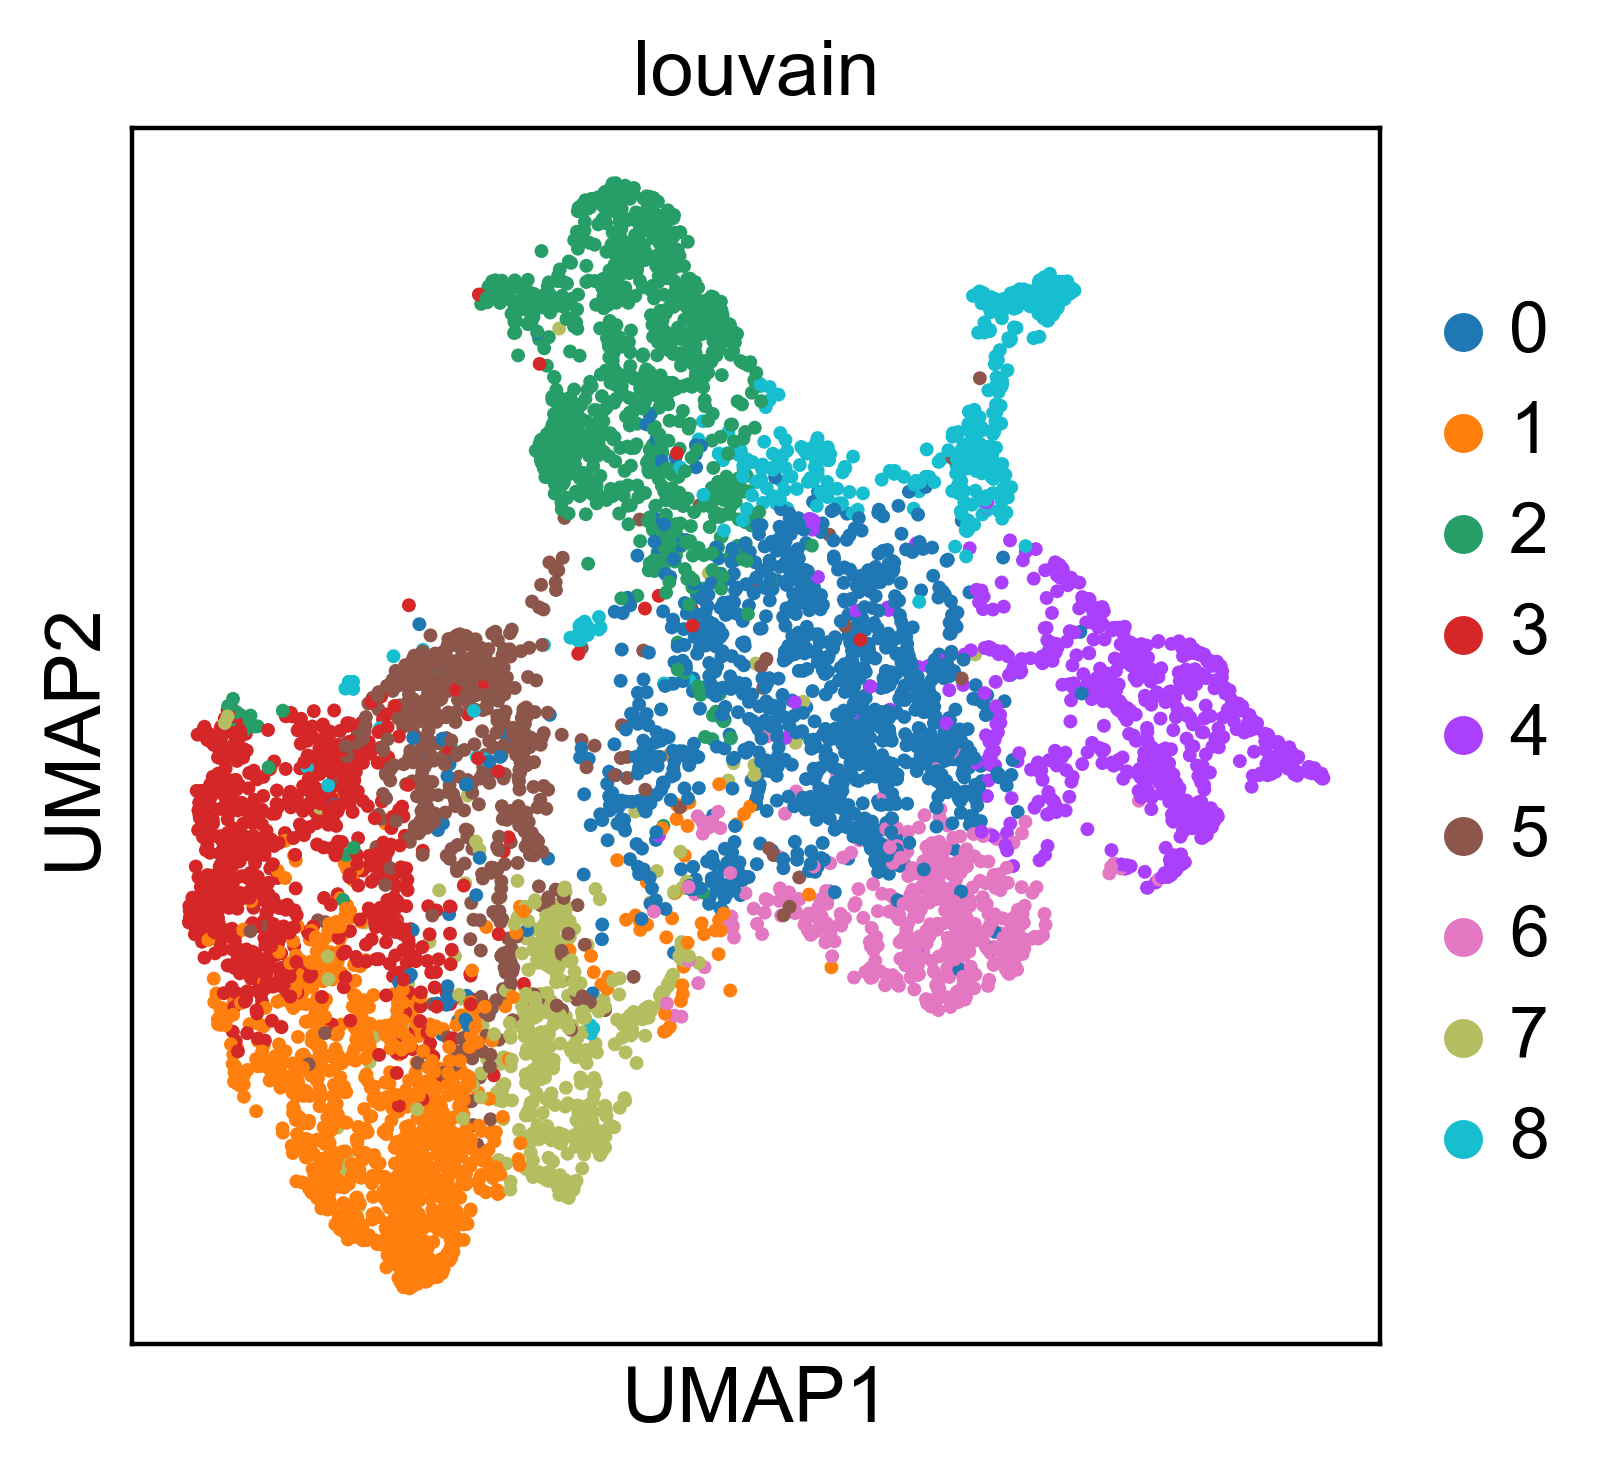

In [3]:
sc.settings.set_figure_params(dpi=200, color_map='viridis')
sc.pl.umap(adata, color='louvain',size=25, save='_louvain.png')

In [4]:
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [5]:
ldata = scv.read('livermerged_2.loom', cache=True)

... reading from cache file ./cache/livermerged_2.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [6]:
ldata.var_names_make_unique()
ldata.obs_names_make_unique()

In [7]:
adata = scv.utils.merge(adata, ldata)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [8]:
scv.utils.show_proportions(adata)
adata

Abundance of ['spliced', 'unspliced', 'ambiguous']: [0.72 0.21 0.07]


AnnData object with n_obs × n_vars = 5616 × 2384 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'patient_id', 'patientno', 'patient_tumorsection', 'ViralvsNonViral', 'PNC', 'PIC', 'NormalvsTumor', 'median genes exp', 'dpt_pseudotime', 'DC1', 'DC2', 'pDC', 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
    var: 'gene_ids', 'n_cells', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'NormalvsTumor_colors', 'ViralvsNonViral_colors', 'diffmap_evals', 'draw_graph', 'iroot', 'louvain', 'louvain_colors', 'louvain_sizes', 'neighbors', 'paga', 'patientno_colors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_draw_graph_fr', 'X_diffmap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [9]:
scv.pp.moments(adata)

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:07) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)


In [10]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [11]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:00:08) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


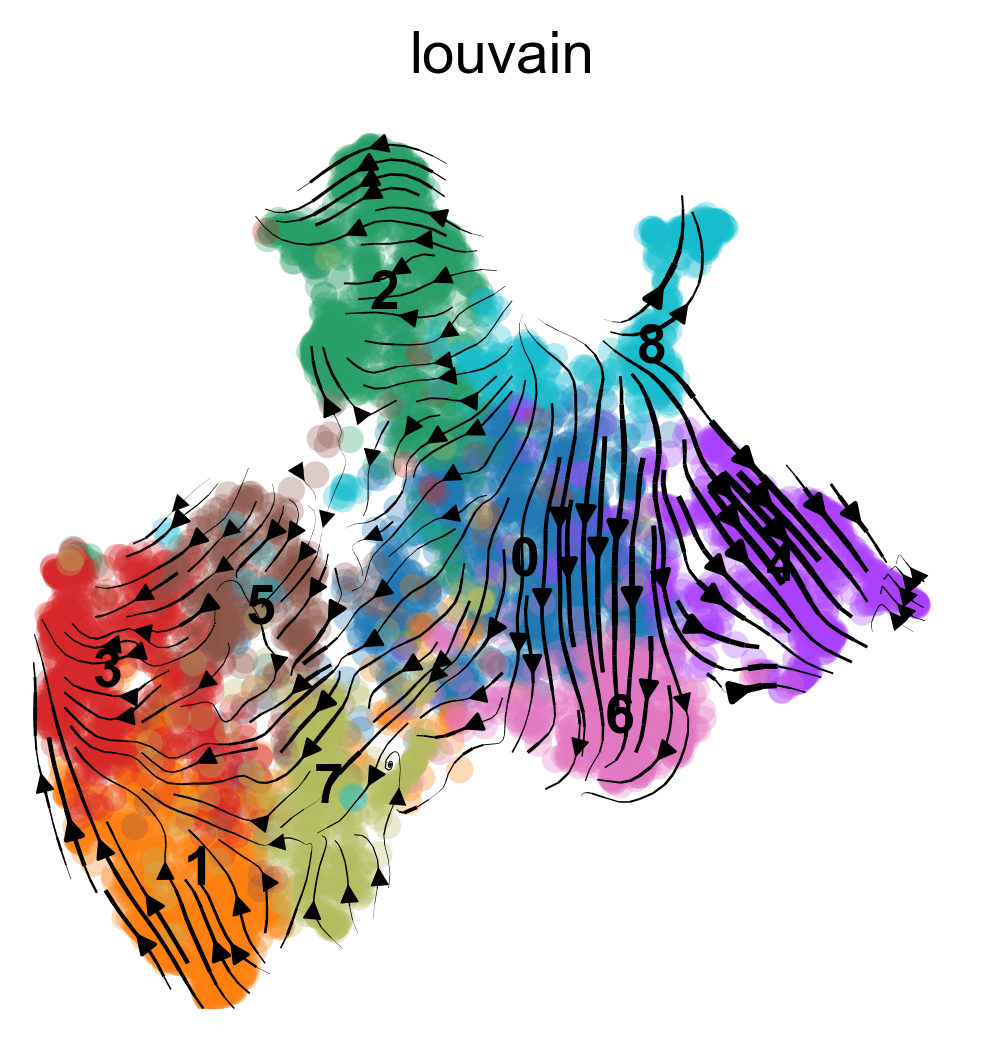

In [12]:
scv.pl.velocity_embedding_stream(adata, layer=['velocity'], color=['louvain'],
                               dpi = 150, use_raw = True, legend_loc = None)

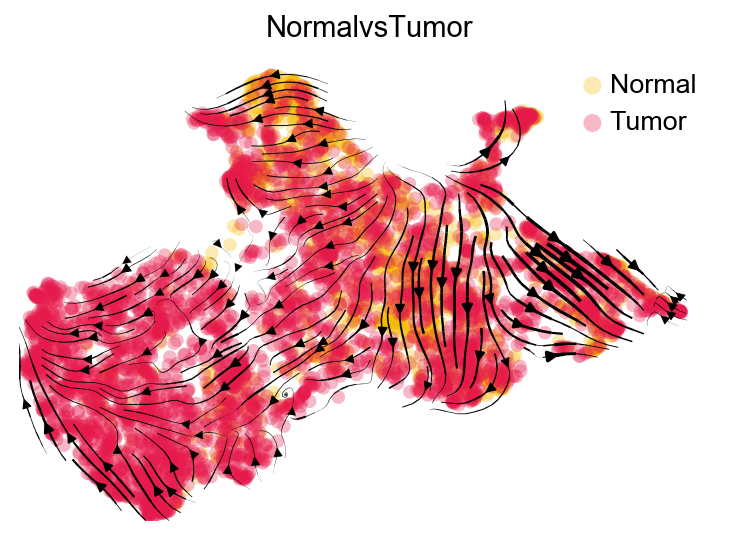

In [2]:
scv.pl.velocity_embedding_stream(adata, layer=['velocity'], color=['NormalvsTumor'],
                               dpi = 150, use_raw = True, legend_loc = None)

In [15]:
scv.settings.set_figure_params('scvelo') 

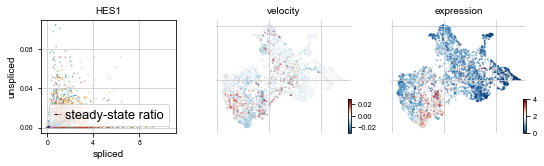

In [3]:
var_names=['HES1']
scv.pl.velocity(adata, var_names=var_names, colorbar=True, ncols=2)

In [13]:
adata.write("C:/Users/seowjjw/Dropbox/Liver_Paper/Github/data/HCCmyewoF.h5ad")